# Logistic Regression Challenge

In [1]:
%cd /content/drive/MyDrive/Business Analyst Workbooks/Logistic Regression

/content/drive/MyDrive/Business Analyst Workbooks/Logistic Regression


In [3]:
# Import Libraries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Load Data
df = pd.read_csv("titanic.csv")

In [5]:
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [6]:
df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>],
       [<Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

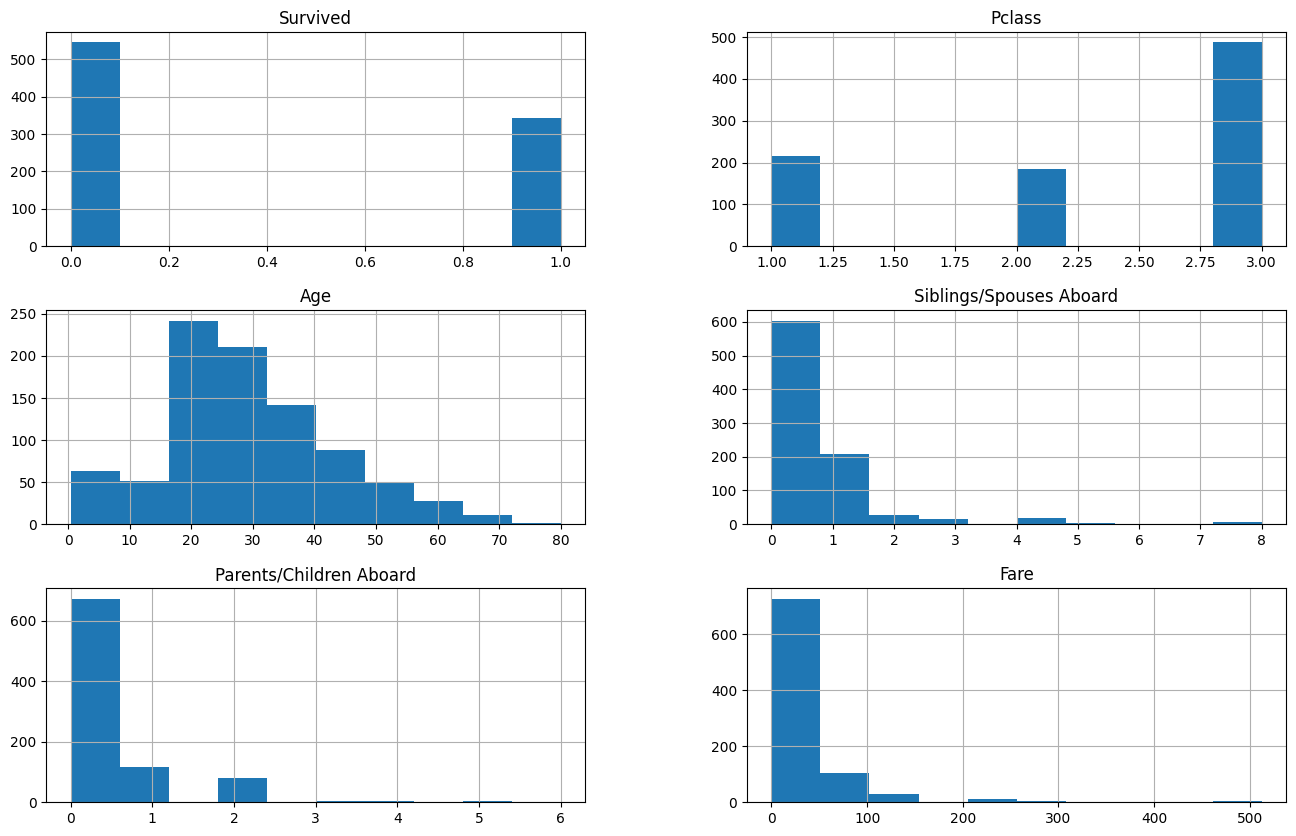

In [7]:
df.hist(figsize=(16,10))

In [9]:
# Drop Name Variable
df = df.drop(columns = "Name")
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [10]:
# Transform Character Variables
df = pd.get_dummies(data = df, drop_first = True)

<Axes: >

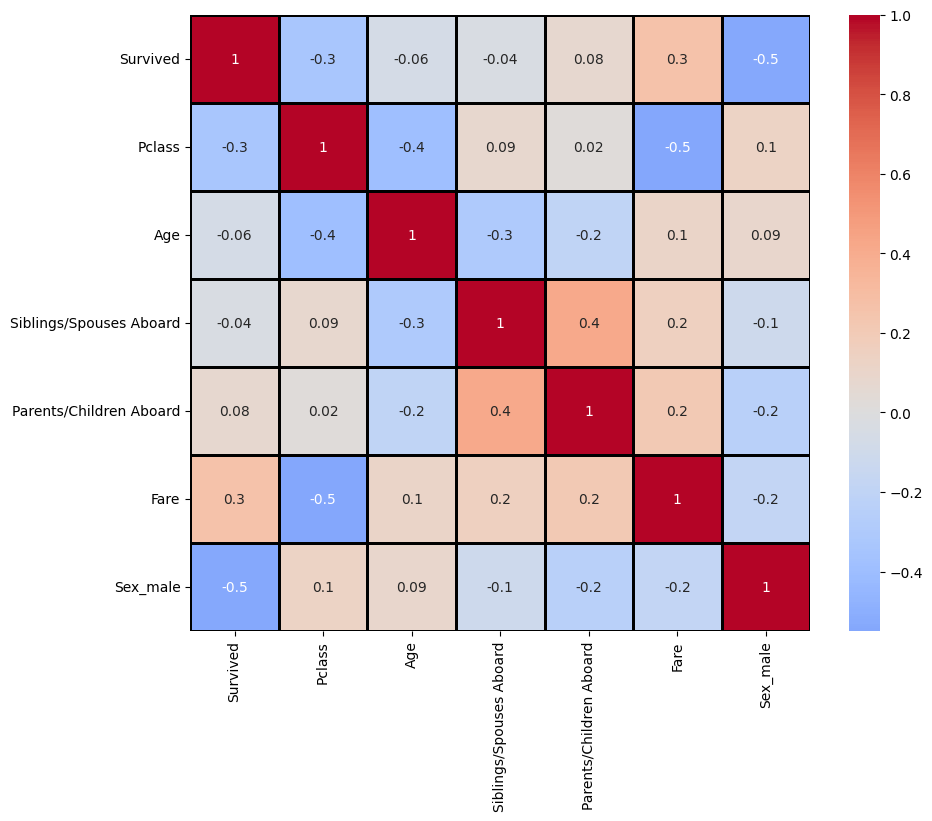

In [11]:
# Correlation Matrix
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(),
            annot = True,
            fmt = '.1g',
            center = 0,
            cmap = 'coolwarm',
            linewidth = 1,
            linecolor = 'black')

# Logistic Regression Prep

In [13]:
# Logistic Regression Prep
y = df.Survived
x = df.drop(columns = "Survived")
x = sm.add_constant(x)

In [16]:
# Training and Test Split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test  = train_test_split(x,y,
                                                    test_size = 0.2,
                                                    random_state = 1502)

# Logistic Regression

In [17]:
# Logistic Regression Assessment
model = sm.Logit(y_train, x_train).fit()

Optimization terminated successfully.
         Current function value: 0.405125
         Iterations 7


In [18]:
print(model.summary())

                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  709
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            6
Date:                Thu, 28 Sep 2023   Pseudo R-squ.:                  0.3915
Time:                        22:29:33   Log-Likelihood:                -287.23
converged:                       True   LL-Null:                       -472.06
Covariance Type:            nonrobust   LLR p-value:                 9.247e-77
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       6.2418      0.686      9.101      0.000       4.898       7.586
Pclass                     -1.3071      0.174     -7.509      0.000      -1.648      -0.966


- All the values are of negative coefficient or statistically insignificant.

# Predictions

In [20]:
# Predictions
predictions = model.predict(x_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 0, 1, 0])

# Classification Report

In [21]:
from sklearn.metrics import  classification_report

In [22]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       108
           1       0.65      0.63      0.64        70

    accuracy                           0.72       178
   macro avg       0.71      0.70      0.70       178
weighted avg       0.72      0.72      0.72       178



- Model is accurate but the variables don't correlate well and this is a very non-continuous data.